# Working up Thorlabs TSP 01 Temperature/Humidity Monitor Data File

Import packages

In [10]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import pandas as pd

Enter file name (without ".txt" extension)

In [ ]:

file_string = 'thlog_01222025'

Load temperature and humidity data in file and convert date and time stamp information to python datetime objects

In [ ]:

df = pd.read_table(file_string + '.txt', header  = 11, encoding_errors='ignore')
th2 = df.to_numpy()

datetime_object_array = []
tempc1 = np.empty(np.shape(th2)[0])
tempc2 = np.empty(np.shape(th2)[0])
rh= np.empty(np.shape(th2)[0])
for i in range(np.shape(th2)[0]):

    datetime_object = datetime.strptime(th2[i,1] + ' ' + th2[i,2], '%b %d %Y %H:%M:%S')
    datetime_object_array.append(datetime_object)
    tempc1[i] = float(th2[i, 3])
    tempc2[i] = float(th2[i, 5])

    rh[i] = float(th2[i, 4])

Convert temperature data from $\degree C$ to $\degree F$

In [ ]:

tempf1 = (tempc1 * 9/5) + 32
tempf2 = (tempc2 * 9/5) + 32


Plot temperature data workup

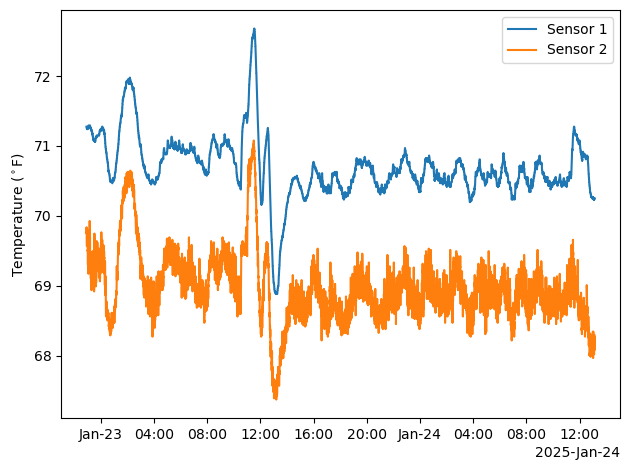

In [11]:
fig, ax = plt.subplots()
ax.set_ylabel('Temperature ($^\circ$F)')
#ax.set_xlabel('Date/Time')
ax.plot(datetime_object_array, tempf1, label = 'Sensor 1')
ax.plot(datetime_object_array, tempf2, label = 'Sensor 2')
ax.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.legend(loc = 'best')
plt.tight_layout()


Plot relative humidity data workup

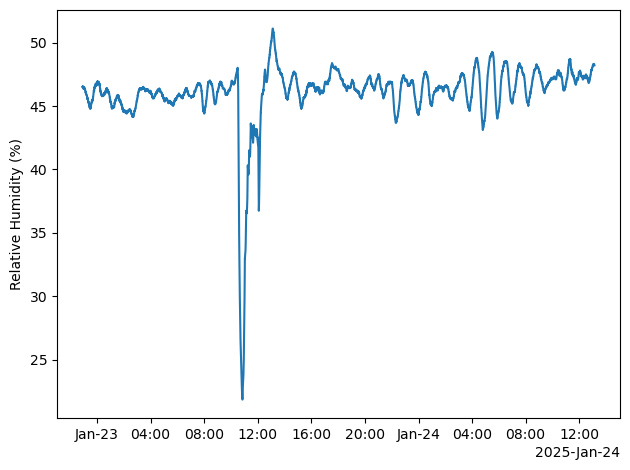

In [12]:
fig, ax = plt.subplots()
ax.set_ylabel('Relative Humidity (%)')
#ax.set_xlabel('Date/Time')
ax.plot(datetime_object_array, rh)
ax.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
plt.tight_layout()